# PreLab 01 : Introduction and Root Finding

#### Objectives

The prelabs are meant to introduce new ideas and get us thinking about the upcoming lab *before* we show up to class. This is individual work but you are free to and encouraged to work on it with others. This prelab is an introduction to some basic programming concepts. We will also begin work on root finding.

The prelabs are more like scratch work. You are not expected to be as careful as with the labs. The final prelab notebook will not be held to the same level of completeness as we require for labs. Even if you get stuck/confused on things you should put in effort to try to understand the important points, and then move on to other parts of the prelab. If you cannot complete a portion of the prelab then you should say what you have done, what is confusing, *etc.* In other words, give some indication of how far you got. This can be done by describing in words what you are thinking.

## Getting Started

We have already used the notebook a bit, but there is a lot to it and a lot of ways to use it. Fortunately there are also a lot of ways to learn about using it. We have discussed some of these: searching the web for information, within the Jupyter Lab interface itself there are a few places to look, and using the `Help` tab in the menu bar. Yet another way to see what is available is through the `Command Palette` which can be activated from the `View` menu. This contains a list of all the commands that you can use in any context along with any keyboard shortcuts that are defined by default. We will be using the notebook, so any commands associated with it will be of interest to us.

It is worthwhile to get used to using keyboard shortcuts. Though everything can be done by pointing and clicking your way through the interface, the keyboard shortcuts make things much faster and more pleasant. It is good to start learning and using them early.

## Good Coding Practices

As stated in Lab00, we should always explicitly load the modules we wish to use. Further, we should do this is a way that does not "pollute the namespace". We will always do that in this course!

As one example of why this is important consider the cosine function. In standard Python the cosine function is *not defined*. Instead we need to load it from somewhere. There are at least three places would could get it from:
1. Python `math` module: This only operates on single numbers. In our work we will usually want our functions to work on arrays.
2. The `numpy` module: This is the one we want to use and the one that gets loaded automatically in various circumstances.
3. The `sympy` module: This would be the one we wanted if we were doing symbolic manipulations (sadly we will not be doing so this semester).

If we were to load all the functions in each of these modules into the default name space and tried to just call the `cos` function which one do we get? It will depend on which one was loaded *most recently*! Since we do not want the behavior of our code to depend on the load order of modules or the state of our kernel we should explicitly load the module we want and use the function from that module.

### Boiler Plate

At the top of all of our documents we should load all the modules we want to use. This will become standard practice in labs from now on. One thing we will always want is the `numpy` module. It can be loaded as
> `import numpy as np`

The `import` command loads a module for us. It creates a namespace with the same name as the module. Thus to access anything defined in the module we would need to prepend it with `numpy.` (notice there is a 'dot' after the `numpy`). For example, to access the cosine function we would use `numpy.cos`. This is a lot of typing. Fortunately we can give it a shorter name (an alias), which is what the `as` phrase does for us. Here we have renamed `numpy` to be `np` so that we can access the cosine function as `np.cos`.

Though we can name our modules anything we want when we import them, there are some standard conventions that have evolved over the years. It is best to use the standard conventions whenever possible. Calling the `numpy` module `np` is quite standard, you will find it in almost any modern example online and is what you should always use.

## Initialization

Initialize your environment by importing all the required modules. For now just import the `numpy` module a discussed above. Below you will see there are other modules we need. Those can be added here and the cell rerun, as needed.

In [1]:
import numpy as np
import scipy.optimize as opt 
import matplotlib.pyplot as plt

## Defining Functions

Defining functions to perform calculations for variable inputs is an essential tool. Here we will define a function to compute $x^a$ for arbitrary $x$ and $a$. To begin we want our function to be created as

    def mypow(x, a):

Complete the definition of this function by filling in the `Code` cell below.

Notes:
- Exponentiation is performed using `**`.
- Do not forget to `return` your answer from the function.
- Remember that spaces matter, all lines of code that are part of a block must be indented to the same level.
- As mentioned in Lab00, do not forget to remove the lines
```
# YOUR CODE HERE
raise NotImplementedError()
```

In [2]:
def mypow(x, a):
    return x**a

In [3]:
# Here is an example of how we can embed tests in our notebooks
# that will give an error if they fail. We will say more about this
# in the future. For now, we will just use the `assert` function from Python.
assert(mypow(2,2) == 2**2)

Now that it is defined you should test it. Run your function and verify it correctly calculates $2^2$, $2^3$, $3^2$, and any other cases you want to try.
(You should try multiple cases, but only need to leave one of them in the cell below.)
For your test (or tests) use `assert`.
It is worth seeing what happens when the test fails.

In [4]:
assert(mypow(2,2) == 2**2)
assert(mypow(2,3) == 2**3)
assert(mypow(3,2) == 3**2)

A function can have default values, that is, optional arguments that do not need to be specified when the function is called. Suppose we *typically* want to calculate $x^2$. In this case it would be tedious to constantly set $a$ to 2 every time we call `mypow`. To avoid this, we can set a default value for $a$ when we define the function. To do so below we modify the way we define the function. Now we start with

    def mypow(x, a=2):

Redefine the `mypow` function using the default value for `a`. Afterward add a new `Code` cell below the function definition and run a few tests. You should run tests like `mypow(2)` and `mypow(2,3)`, *etc.* to see how they behave.

Note: The code in the body of our function does **not change**. Only how we create the function (the function signature) changes.

In [5]:
def mypow(x, a=2):
    return x**a

In [6]:
mypow(2,3)

8

In [7]:
# Another simple test. We should always test our code!
assert(mypow(2) == 4)

The function you wrote works for more than just numbers. We can also pass an array to it and it will do the "right thing" with no extra work required by us!  Let $x$ be an array of 10 values from 0 to 2. Create this array and pass it to `mypow`. You should find it returns an array of the squares of all the values you passed in.

In [8]:
x = np.linspace(0,2,10)
mypow(x)

array([0.        , 0.04938272, 0.19753086, 0.44444444, 0.79012346,
       1.2345679 , 1.77777778, 2.41975309, 3.16049383, 4.        ])

This would also "magically" work if $x$ were a single number and $a$ were an array. (Feel free to test this yourself). Unfortunately, the function does not "magically" work if both $x$ and $a$ are arrays of *different lengths*. (If they are the same length then the function would not produce an error. Whether it produces something useful or not depends on your expectations! Here is another thing worth trying and understanding.) For example, let $a$ be an array from 1 to 4 in steps of 1. Using this $a$ and the $x$ array from the previous part try to run `mypow` and see what happens. You should get an error.

In [9]:
a=np.arange(1,5,1)
mypow(x,a)

ValueError: operands could not be broadcast together with shapes (10,) (4,) 

We can fix the problem encountered in the previous part but we will need to learn about broadcasting to do so. We will postpone that for future consideration.

## Root Finding

Many root finding algorithms are implemented for us in `scipy.optimize` along with many other algorithms we will not talk about (but are briefly discussed in the root finding example from class). You should review this document! We will focus on `bisect` and `brentq` (though you can try out others for fun). I typically load this module using
> `import scipy.optimize as opt`

to give it a short, easy to type name. Add the importing of `scipy.optimize` to your initialization section above.

To get some practice consider the two equations and intervals provided :
\begin{align}
    x = 3^{-x}, && \hbox{root in}\; \hphantom{-}(0.1,1), \\
    \mathrm{e}^{6x} + 3(\ln 2)^2 \mathrm{e}^{2x} - (\ln 8)\mathrm{e}^{4x} - (\ln2)^3 = 0, && \hbox{root in}\; (-1, 0.2).
\end{align}

We want to find the solutions to these equations to a tolerance of $10^{-14}$. Provide code below for finding the solutions to these equations using both `bisect` and `brentq`. Your code should define the functions, find and print the roots, and also print the total number of iterations required for each function using each method.

Notes: 
1. Most of the common functions are defined in `numpy`. This is true for the logarithm and the exponential functions which can be accessed via `np.log` and `np.exp`.
2. Notice that the `numpy` function `log(x)` returns the *natural logarithm*, not the logarithm base 10. This is true for every math library of which I am aware.
3. Though it is *usually* true that a more sophisticated method is faster than a simpler method, it is not always true. This example shows that. The second equation has some interesting behavior.

In [12]:
def eq1(x):
    return x-3**(-x)

def eq2(x):
    return np.exp(6*x)+3*(np.log(2)**2)*np.exp(2*x)-np.log(8)*np.exp(4*x)-(np.log(2))**3

(bi1r, bi1i) = opt.bisect(eq1, .1,1, full_output=True, xtol=1e-14)
(br1r, br1i) = opt.brentq(eq1, .1,1, full_output=True, xtol=1e-14)
(bi2r, bi2i) = opt.bisect(eq2, -1,.2, full_output=True, xtol=1e-14)
(br2r, br2i) = opt.brentq(eq2, -1,.2, full_output=True, xtol=1e-14)

print(f'Equation 1:\nBisection: root at {bi1r} with {bi1i.iterations} iterations\nBrent: root at {br1r} with {br1i.iterations} iterations')
print()
print(f'Equation 2:\nBisection: root at {bi2r} with {bi2i.iterations} iterations\nBrent: root at {br2r} with {br2i.iterations} iterations')

Equation 1:
Bisection: root at 0.5478086216540996 with 47 iterations
Brent: root at 0.5478086216540975 with 7 iterations

Equation 2:
Bisection: root at -0.18325825840084634 with 47 iterations
Brent: root at -0.18325980148201765 with 68 iterations


## Plotting

### Boiler Plate

There are a few ways to create plots. Here is an example we will use for now. It should work for almost everything we need to do in this class. Comments are included to give a broad overview of what each line does. Remember that you can (and should) always lookup the actual functions and get full documentation on them!

```python
# Load the main plotting routines from matplotlib and give them the alias: plt
# "Everybody" imports it this way.
import matplotlib.pyplot as plt
# In older versions we would have to ensure that all plots show up in the 
# notebook by including the line
# %matplotlib inline
# This is now the default so need not be included.
# You may encounter this line in older notebooks, you can ignore it.

# Create a figure.
fig = plt.figure()
# Create an axis inside the figure. An axis is what we normally think of as a plot.
# It is where we will draw lines, histograms, put labels, etc. There can be multiple
# axes per figure. As the function name suggests we can also think of them as subplots.
# The syntax here is similar to that used in Matlab. The "111" is short hand notation.
# See the documentation for details. There are other ways of producing axes, but this
# is good enough for most basic uses.
ax = fig.add_subplot(111)

# Start plotting .... We can do everything we want now using the axis, called ax,
# that we just created. We can plot using ax.plot, etc. Setting labels and the title
# are also similar though we typically need to prepend them with set_, for example
# ax.set_xlabel.
```

The importing of `matplotlib.pyplot` should also be part of your initialization. Add this to your initialization section near the top of the notebook.

## Practice

To get some practice using the ideas from above create a plot of the cosine function from $0$ to $2\pi$. Include all the "boiler plate" needed. Explicitly use functions and variables from the appropriate namespace. (For example, where is $\pi$ defined? This is not normally defined in the Python global namespace.) Your plot should follow the guidelines from Lab00.

Note: This is a case where you should do your best to put everything together, but it is fine to not spend hours trying to get all the details correct. There are also a lot of things that can be added to the figure. In this case it is nice to draw a black, horizontal line at $y=0$. Horizontal lines can be drawn using `axhline`. It is also nice to set the limits on the $x$ axis to be only those plotted. `matplotlib` does its best to guess a good set of limits, but it does not always guess correctly.

Text(0.5, 1.0, 'Cosine of x From 0 to 2π')

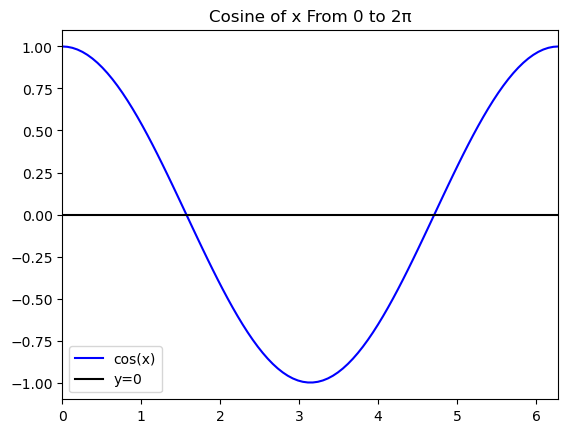

In [11]:
x=np.linspace(0,2*np.pi, 100)
y=np.cos(x)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,y, c='b', label='cos(x)')
ax.set_xlim(0,2*np.pi)
ax.axhline(0, color='black', label="y=0")
ax.legend()
ax.set_title("Cosine of x From 0 to 2π")

## Turning in the PreLab

Turning in the prelabs is similar to turning in the labs. Again they will be submitted via Canvas. Again the **name of the file cannot change**. For this prelab the uploaded file **must be named** `PreLab01.ipynb`.

By submitting this prelab via Canvas you are affirming that it is your work. As discussed in Lab00, if this is not true it is cheating and will be treated as a violation of academic integrity.